In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
# Import Data

X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=True)
# X.drop(['s6', 'age', 's3'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)
X.head()

NameError: name 'load_diabetes' is not defined

In [3]:
model = 'RF'

clf = RandomForestRegressor() if model=='RF' else LinearRegression()
clf.fit(X_train, y_train)  # train model
clf.score(X_test, y_test)  # evaluate model

0.43940861599898584

In [4]:
# feature importance

data = clf.feature_importances_ if model=='RF' else clf.coef_
pd.Series(data, index=X.columns).sort_values(ascending=False)

bmi    0.354495
s5     0.230627
bp     0.086232
s6     0.067037
s2     0.063865
age    0.058740
s1     0.051694
s3     0.050948
s4     0.027309
sex    0.009052
dtype: float64

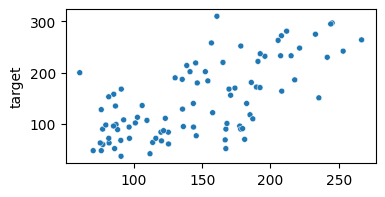

In [5]:
# Scatterplot y=y_true Vs x=y_pred

plt.figure(figsize=(4, 2))
y_pred = clf.predict(X_test)
sns.scatterplot(x=y_pred, y=y_test, size=0.3, legend=False)
plt.show()